In [1]:
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

In [2]:
data = pd.read_csv("../data/train.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24001 entries, 0 to 24000
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  24001 non-null  int64  
 1   limit_bal    24001 non-null  int64  
 2   sex          24001 non-null  int64  
 3   education    24001 non-null  int64  
 4   marriage     24001 non-null  int64  
 5   age          24001 non-null  int64  
 6   pay_1        24001 non-null  int64  
 7   pay_2        24001 non-null  int64  
 8   pay_3        24001 non-null  int64  
 9   pay_4        24001 non-null  int64  
 10  pay_5        23819 non-null  float64
 11  pay_6        22790 non-null  float64
 12  bill_amt1    24001 non-null  int64  
 13  bill_amt2    24001 non-null  int64  
 14  bill_amt3    24001 non-null  int64  
 15  bill_amt4    24001 non-null  int64  
 16  bill_amt5    23819 non-null  float64
 17  bill_amt6    22790 non-null  float64
 18  pay_amt1     24001 non-null  int64  
 19  pay_

In [4]:
data.head()

,customer_id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_oct
0,1,1500,2,1,2,23,0,0,0,2,...,1463,938.0,698.0,75,150,86,0,50.0,50.0,yes
1,2,8500,2,2,2,29,0,0,0,0,...,8364,8275.0,8425.0,300,400,315,300,325.0,305.0,no
2,3,1000,1,1,2,22,0,0,0,0,...,933,772.0,794.0,150,150,150,24,105.0,110.0,no
3,4,10500,1,1,1,31,0,0,0,0,...,7190,7229.0,7340.0,255,260,258,260,265.0,307.0,no
4,5,10500,2,2,1,44,0,0,0,0,...,3558,3592.0,3496.0,180,155,145,130,135.0,200.0,no


In [5]:
data[data['default_oct']=='yes'].iloc[0:15].transpose()

,0,10,11,19,25,27,29,30,36,37,39,41,57,60,61
customer_id,1,11,12,20,26,28,30,31,37,38,40,42,58,61,62
limit_bal,1500,4500,5500,5000,2500,24000,1500,4000,2500,12000,2500,5500,11000,1000,9000
sex,2,2,2,2,2,2,2,2,1,2,1,2,1,1,2
education,1,2,3,2,2,1,2,1,2,1,2,1,2,3,1
marriage,2,2,2,2,2,1,1,2,2,1,2,1,1,1,2
age,23,33,43,27,29,39,35,29,43,40,43,32,35,52,27
pay_1,0,2,2,3,2,0,0,1,1,2,0,2,0,1,2
pay_2,0,2,2,2,2,0,0,-2,2,2,0,2,0,2,2
pay_3,0,0,0,0,2,0,0,-1,2,2,0,0,0,0,0
pay_4,2,0,0,0,0,-1,0,0,0,2,0,0,0,0,0


In [6]:
data[data['default_oct']=='no'].iloc[0:15].transpose()

,1,2,3,4,5,6,7,8,9,12,13,14,15,16,17
customer_id,2,3,4,5,6,7,8,9,10,13,14,15,16,17,18
limit_bal,8500,1000,10500,10500,4500,11000,9000,15000,2500,10000,6000,10000,9000,11500,29000
sex,2,1,1,2,2,2,1,1,1,2,2,2,2,2,2
education,2,1,1,2,1,2,1,1,3,1,1,2,2,1,1
marriage,2,2,1,1,2,1,1,1,2,2,2,1,1,1,1
age,29,22,31,44,27,34,50,54,23,59,26,28,46,37,31
pay_1,0,0,0,0,-2,0,0,0,0,0,0,0,-1,0,0
pay_2,0,0,0,0,-2,0,0,0,0,0,0,0,-1,0,0
pay_3,0,0,0,0,2,0,0,-2,0,0,0,0,-1,0,0
pay_4,0,0,0,0,2,0,0,-2,0,0,0,0,-1,0,0


In [7]:
for col in ['sex', 'education', 'marriage', 'pay_1', 'pay_2']:
    print(data[col].value_counts())
    

2    14498
1     9503
Name: sex, dtype: int64
2    11248
1     8424
3     3942
5      234
4      104
6       39
0       10
Name: education, dtype: int64
2    12746
1    10945
3      268
0       42
Name: marriage, dtype: int64
 0    11793
-1     4552
 1     2968
-2     2196
 2     2121
 3      257
 4       58
 5       23
 8       15
 6       11
 7        7
Name: pay_1, dtype: int64
 0    12591
-1     4828
 2     3135
-2     3025
 3      267
 4       80
 1       26
 5       22
 7       16
 6       10
 8        1
Name: pay_2, dtype: int64


- education, marriage, pay_* columns have extra categories than mentioned in the project readme?

In [8]:
# not many times though
for col in ['bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6']:
    print(col, data[data[col]<0][col].count())

bill_amt1 325
bill_amt2 374
bill_amt3 367
bill_amt4 397
bill_amt5 390
bill_amt6 391


In [9]:
data[data['pay_amt1']<0]['pay_amt1'].unique()

array([], dtype=int64)

# New features

- Sex not being used just to be fair in the modeling process, it individually anyways doesn't have IV (in next section)

In [7]:
for col in ['bill_amt5', 'bill_amt6', 'pay_amt5', 'pay_amt6', 'pay_5', 'pay_6']:
    data[col] = data[col].fillna(0)

In [8]:
data['bill_amt_avg'] = data[['bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 
                             'bill_amt6']].mean(axis=1)
data['pay_amt_avg'] = data[['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 
                             'pay_amt6']].mean(axis=1)

In [9]:
for col in range(1,7):
    data['diff_amt'+str(col)] = data['pay_amt'+str(col)]-data['bill_amt'+str(col)]

In [10]:
education_limit_summary = data.groupby("education").agg({"limit_bal":[np.mean, np.max, np.min], 
                                                         "bill_amt_avg":[np.mean, np.max, np.min], 
                                                         "pay_amt_avg":[np.mean, np.max, np.min]})
education_limit_summary.columns = education_limit_summary.columns.map('_'.join).to_series().map(
    lambda x: "education_"+x)
education_limit_summary = education_limit_summary.reset_index()

In [11]:
education_limit_summary

,education,education_limit_bal_mean,education_limit_bal_amax,education_limit_bal_amin,education_bill_amt_avg_mean,education_bill_amt_avg_amax,education_bill_amt_avg_amin,education_pay_amt_avg_mean,education_pay_amt_avg_amax,education_pay_amt_avg_amin
0,0,11650.000000,18000,5000,371.483333,1222.000000,10.000000,292.066667,831.333333,0.0
1,1,10616.868471,50000,500,2199.130283,43865.333333,-2162.166667,318.132993,31367.000000,0.0
2,2,7342.309744,40000,500,2324.039237,27416.666667,-1046.000000,234.108893,6825.500000,0.0
3,3,6340.436327,38000,500,2046.212286,28324.166667,-662.333333,211.191696,9710.333333,0.0
4,4,10725.961538,35500,1000,2152.423077,14312.000000,-0.166667,282.847756,2083.833333,0.0
5,5,8125.213675,25000,500,3111.095442,26240.000000,-48.166667,302.403134,3167.500000,0.0
6,6,7423.076923,27000,500,2663.683761,12715.833333,0.000000,425.482906,3785.000000,0.0


In [12]:
data['age_bins'] = pd.qcut(data['age'], 6, labels=[
    "age_lt_26", "age_bt_26_30", "age_bt_30_34",
    "age_bt_34_39", "age_bt_39_45", "age_gt_45"]) # 6 decided by analysis in the next section woe_iv
age_limit_summary = data.groupby("age_bins").agg({"limit_bal":[np.mean, np.max, np.min], 
                                                  "bill_amt_avg":[np.mean, np.max, np.min], 
                                                  "pay_amt_avg":[np.mean, np.max, np.min]})
age_limit_summary.columns = age_limit_summary.columns.map('_'.join).to_series().map(
    lambda x: "age_"+x)

age_limit_summary = age_limit_summary.reset_index()

In [13]:
age_limit_summary

,age_bins,age_limit_bal_mean,age_limit_bal_amax,age_limit_bal_amin,age_bill_amt_avg_mean,age_bill_amt_avg_amax,age_bill_amt_avg_amin,age_pay_amt_avg_mean,age_pay_amt_avg_amax,age_pay_amt_avg_amin
0,age_lt_26,4365.085158,25000,500,1609.743552,19373.666667,-581.333333,162.884550,4091.333333,0.0
1,age_bt_26_30,8613.127001,37500,500,2358.213767,25935.833333,-244.000000,271.693561,15802.000000,0.0
2,age_bt_30_34,9882.581857,35500,500,2378.918366,25629.000000,-2162.166667,295.554169,19284.000000,0.0
3,age_bt_34_39,9900.702349,37000,500,2422.595382,29621.166667,-395.333333,289.484338,9710.333333,0.0
4,age_bt_39_45,9187.777162,39000,500,2412.362759,28878.666667,-662.333333,289.683343,31367.000000,0.0
5,age_gt_45,8360.833556,50000,500,2286.148544,43865.333333,-544.833333,262.192582,9564.833333,0.0


In [14]:
marriage_limit_summary = data.groupby("marriage").agg({"limit_bal":[np.mean, np.max, np.min], 
                                                       "bill_amt_avg":[np.mean, np.max, np.min], 
                                                       "pay_amt_avg":[np.mean, np.max, np.min]})
marriage_limit_summary.columns = marriage_limit_summary.columns.map('_'.join).to_series().map(
    lambda x: "marriage_"+x)
marriage_limit_summary = marriage_limit_summary.reset_index()

In [15]:
marriage_limit_summary

,marriage,marriage_limit_bal_mean,marriage_limit_bal_amax,marriage_limit_bal_amin,marriage_bill_amt_avg_mean,marriage_bill_amt_avg_amax,marriage_bill_amt_avg_amin,marriage_pay_amt_avg_mean,marriage_pay_amt_avg_amax,marriage_pay_amt_avg_amin
0,0,6523.809524,15000,1000,906.468254,3781.500000,0.000000,179.698413,1281.833333,0.0
1,1,9084.659662,50000,500,2334.128476,43865.333333,-1046.000000,268.056297,19284.000000,0.0
2,2,7800.917935,39000,500,2177.753007,29621.166667,-2162.166667,254.629361,15802.000000,0.0
3,3,4863.805970,25000,500,1675.876244,14597.833333,-58.333333,292.875000,31367.000000,0.0


In [16]:
data = data\
.merge(education_limit_summary, on='education')\
.merge(age_limit_summary, on="age_bins")\
.merge(marriage_limit_summary, on="marriage")


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24001 entries, 0 to 24000
Data columns (total 61 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   customer_id                  24001 non-null  int64   
 1   limit_bal                    24001 non-null  int64   
 2   sex                          24001 non-null  int64   
 3   education                    24001 non-null  int64   
 4   marriage                     24001 non-null  int64   
 5   age                          24001 non-null  int64   
 6   pay_1                        24001 non-null  int64   
 7   pay_2                        24001 non-null  int64   
 8   pay_3                        24001 non-null  int64   
 9   pay_4                        24001 non-null  int64   
 10  pay_5                        24001 non-null  float64 
 11  pay_6                        24001 non-null  float64 
 12  bill_amt1                    24001 non-null  int64   
 13  b

In [18]:
data['pay_1'].value_counts()

 0    11793
-1     4552
 1     2968
-2     2196
 2     2121
 3      257
 4       58
 5       23
 8       15
 6       11
 7        7
Name: pay_1, dtype: int64

In [19]:
data[data['pay_1']==0]['default_oct'].value_counts()

no     10268
yes     1525
Name: default_oct, dtype: int64

In [23]:
data[data['pay_1']==-1]['default_oct'].value_counts()

no     3788
yes     764
Name: default_oct, dtype: int64

In [24]:
data[data['pay_1']==-2]['default_oct'].value_counts()

no     1906
yes     290
Name: default_oct, dtype: int64

In [25]:
data['age_bins']

0           age_lt_26
1           age_lt_26
2           age_lt_26
3           age_lt_26
4           age_lt_26
             ...     
23996    age_bt_39_45
23997    age_bt_39_45
23998    age_bt_39_45
23999    age_bt_39_45
24000    age_bt_39_45
Name: age_bins, Length: 24001, dtype: category
Categories (6, object): ['age_lt_26' < 'age_bt_26_30' < 'age_bt_30_34' < 'age_bt_34_39' < 'age_bt_39_45' < 'age_gt_45']

# Doing woe and iv analysis for continuous and categorical columns to find individual best preds
- for continuous variables explore binning options

In [56]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 'no')].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 'yes')].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [142]:
for bins in range(3, 15):
    data['age_bins'] = pd.qcut(data['age'], bins)
    print('WoE and IV for column: {} at num bins: {}'.format("age_bins", bins))
    df, iv = calculate_woe_iv(data, "age_bins", 'default_oct')
    print(df)
    print('IV score: {:.5f}'.format(iv))
#     print('\n')

WoE and IV for column: age_bins at num bins: 3
            Value   All  Good   Bad  Distr_Good  Distr_Bad       WoE        IV
2    (39.0, 79.0]  7351  5620  1731    0.300663   0.326050 -0.081060  0.002058
0  (20.999, 30.0]  8795  6835  1960    0.365664   0.369184 -0.009580  0.000034
1    (30.0, 39.0]  7855  6237  1618    0.333672   0.304765  0.090616  0.002619
IV score: 0.00471
WoE and IV for column: age_bins at num bins: 4
            Value   All  Good   Bad  Distr_Good  Distr_Bad       WoE        IV
2    (41.0, 79.0]  5980  4568  1412    0.244383   0.265963 -0.084624  0.001826
0  (20.999, 28.0]  6421  4936  1485    0.264070   0.279714 -0.057552  0.000900
3    (34.0, 41.0]  5500  4291  1209    0.229563   0.227727  0.008034  0.000015
1    (28.0, 34.0]  6100  4897  1203    0.261984   0.226596  0.145112  0.005135
IV score: 0.00788
WoE and IV for column: age_bins at num bins: 5
            Value   All  Good   Bad  Distr_Good  Distr_Bad       WoE        IV
2    (43.0, 79.0]  4798  3653  11

- as per above bin age to 6 buckets; 9 is best but parsimonously 6 is better

In [77]:
for bins in range(3, 10):
    data['limit_bal_bins'] = pd.qcut(data['limit_bal'], bins)
    print('WoE and IV for column: {} at num bins: {}'.format("limit_bal_bins", bins))
    df, iv = calculate_woe_iv(data, "limit_bal_bins", 'default_oct')
    print('IV score: {:.5f}'.format(iv))


WoE and IV for column: limit_bal_bins at num bins: 3
IV score: 0.14048
WoE and IV for column: limit_bal_bins at num bins: 4
IV score: 0.15779
WoE and IV for column: limit_bal_bins at num bins: 5
IV score: 0.15552
WoE and IV for column: limit_bal_bins at num bins: 6
IV score: 0.15934
WoE and IV for column: limit_bal_bins at num bins: 7
IV score: 0.17339
WoE and IV for column: limit_bal_bins at num bins: 8
IV score: 0.17111
WoE and IV for column: limit_bal_bins at num bins: 9
IV score: 0.17255


In [91]:
for col in ['bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6']:
    iv_values = {}
    for bins in range(3, 12):
        data[col+'_bins'] = pd.qcut(data[col], bins)
        df, iv = calculate_woe_iv(data, col+'_bins', 'default_oct')
        iv_values[bins] = np.round(iv, 4)
    k, v = sorted(iv_values.items(), key = lambda x: x[1], reverse=True)[0]
    print("IV values for col: {} is max at num bins: {} with IV: {}".format(col, k, v))
    print("IV values: ", iv_values)

IV values for col: bill_amt1 is max at num bins: 10 with IV: 0.0158
IV values:  {3: 0.0072, 4: 0.0053, 5: 0.0135, 6: 0.0128, 7: 0.0123, 8: 0.0137, 9: 0.0136, 10: 0.0158, 11: 0.0154}
IV values for col: bill_amt2 is max at num bins: 10 with IV: 0.0133
IV values:  {3: 0.006, 4: 0.0039, 5: 0.0124, 6: 0.0111, 7: 0.0096, 8: 0.0113, 9: 0.009, 10: 0.0133, 11: 0.013}
IV values for col: bill_amt3 is max at num bins: 11 with IV: 0.0137
IV values:  {3: 0.0069, 4: 0.0054, 5: 0.011, 6: 0.0133, 7: 0.0116, 8: 0.0118, 9: 0.0117, 10: 0.0121, 11: 0.0137}
IV values for col: bill_amt4 is max at num bins: 11 with IV: 0.0183
IV values:  {3: 0.0048, 4: 0.0058, 5: 0.0117, 6: 0.0122, 7: 0.0131, 8: 0.0119, 9: 0.0155, 10: 0.0124, 11: 0.0183}
IV values for col: bill_amt5 is max at num bins: 11 with IV: 0.022
IV values:  {3: 0.0033, 4: 0.0123, 5: 0.0084, 6: 0.0097, 7: 0.0126, 8: 0.0125, 9: 0.0133, 10: 0.0139, 11: 0.022}
IV values for col: bill_amt6 is max at num bins: 10 with IV: 0.0213
IV values:  {3: 0.0018, 4: 0

In [87]:
for col in ['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']:
    iv_values = {}
    for bins in range(2, 5):
        data[col+'_bins'] = pd.qcut(data[col], bins)
        df, iv = calculate_woe_iv(data, col+'_bins', 'default_oct')
        iv_values[bins] = np.round(iv, 4)
    k, v = sorted(iv_values.items(), key = lambda x: x[1], reverse=True)[0]
    print("IV values for col: {} is max at num bins: {} with IV: {}".format(col, k, v))
    print("IV values: ", iv_values)

IV values for col: pay_amt1 is max at num bins: 4 with IV: 0.1418
IV values:  {2: 0.0842, 3: 0.1268, 4: 0.1418}
IV values for col: pay_amt2 is max at num bins: 4 with IV: 0.1143
IV values:  {2: 0.0755, 3: 0.1028, 4: 0.1143}
IV values for col: pay_amt3 is max at num bins: 4 with IV: 0.111
IV values:  {2: 0.0709, 3: 0.0893, 4: 0.111}
IV values for col: pay_amt4 is max at num bins: 4 with IV: 0.0888
IV values:  {2: 0.0636, 3: 0.0755, 4: 0.0888}
IV values for col: pay_amt5 is max at num bins: 4 with IV: 0.0752
IV values:  {2: 0.053, 3: 0.0669, 4: 0.0752}
IV values for col: pay_amt6 is max at num bins: 4 with IV: 0.0862
IV values:  {2: 0.0629, 3: 0.0756, 4: 0.0862}


In [107]:
for col in ['diff_amt1', 'diff_amt2', 'diff_amt3', 'diff_amt4', 'diff_amt5', 'diff_amt6']:
    iv_values = {}
    for bins in range(2, 5):
        data[col+'_bins'] = pd.qcut(data[col], bins)
        df, iv = calculate_woe_iv(data, col+'_bins', 'default_oct')
        iv_values[bins] = np.round(iv, 4)
    k, v = sorted(iv_values.items(), key = lambda x: x[1], reverse=True)[0]
    print("IV values for col: {} is max at num bins: {} with IV: {}".format(col, k, v))
    print("IV values: ", iv_values)

IV values for col: diff_amt1 is max at num bins: 4 with IV: 0.0174
IV values:  {2: 0.0001, 3: 0.0173, 4: 0.0174}
IV values for col: diff_amt2 is max at num bins: 4 with IV: 0.0194
IV values:  {2: 0.0004, 3: 0.0165, 4: 0.0194}
IV values for col: diff_amt3 is max at num bins: 4 with IV: 0.0184
IV values:  {2: 0.0016, 3: 0.015, 4: 0.0184}
IV values for col: diff_amt4 is max at num bins: 4 with IV: 0.0122
IV values:  {2: 0.0021, 3: 0.0081, 4: 0.0122}
IV values for col: diff_amt5 is max at num bins: 4 with IV: 0.0361
IV values:  {2: 0.0044, 3: 0.01, 4: 0.0361}
IV values for col: diff_amt6 is max at num bins: 4 with IV: 0.04
IV values:  {2: 0.0068, 3: 0.0091, 4: 0.04}


In [94]:
for col in ['sex' , 'education', 'marriage']:
    df, iv = calculate_woe_iv(data, col, 'default_oct')
    iv = np.round(iv, 4)
    print("IV value for col: {} is: {}".format(col, iv))

IV value for col: sex is: 0.0077
IV value for col: education is: 0.0376
IV value for col: marriage is: 0.0084


In [111]:
data['sex_edu_marr'] = data['sex'].astype(str) +"_"+ data['education'].astype(str) +"_"+ data['marriage'].astype(str)

In [113]:
col = 'sex_edu_marr'
df, iv = calculate_woe_iv(data, col, 'default_oct')
iv = np.round(iv, 4)
print("IV value for col: {} is: {}".format(col, iv))

IV value for col: sex_edu_marr is: 0.0561


- Following look to be the strongest predictors by far:

In [118]:
for col in ['pay_1' , 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']:
    df, iv = calculate_woe_iv(data, col, 'default_oct')
    iv = np.round(iv, 4)
    print("IV value for col: {} is: {}".format(col, iv))

IV value for col: pay_1 is: 0.8534
IV value for col: pay_2 is: 0.5339
IV value for col: pay_3 is: 0.4061
IV value for col: pay_4 is: 0.3648
IV value for col: pay_5 is: 0.3389
IV value for col: pay_6 is: 0.2891


/Users/shashankbassi/opt/anaconda3/envs/redventures/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Summary of WOE_IV:
- no need to bin balance, bill, pay_amt columns
- bin age column into 6 quantiles
- pay_* are quite strong predictors; also looks like they are better off been treated as categorical variables
- education is also a medium predictor

# Feature Selection

In [113]:
corr_matrix = data[numerical_columns].corr().to_dict()
for key1 in corr_matrix.keys():
    for key2 in corr_matrix[key1]:
        if key1 != key2:
            if (corr_matrix[key1][key2] > 0.5) or (corr_matrix[key1][key2] < -0.5):
                print(key1, key2)


bill_amt1 bill_amt2
bill_amt1 bill_amt3
bill_amt1 bill_amt4
bill_amt1 bill_amt5
bill_amt1 bill_amt6
bill_amt1 bill_amt_avg
bill_amt1 diff_amt1
bill_amt1 diff_amt2
bill_amt1 diff_amt3
bill_amt1 diff_amt4
bill_amt1 diff_amt5
bill_amt1 diff_amt6
bill_amt2 bill_amt1
bill_amt2 bill_amt3
bill_amt2 bill_amt4
bill_amt2 bill_amt5
bill_amt2 bill_amt6
bill_amt2 bill_amt_avg
bill_amt2 diff_amt1
bill_amt2 diff_amt2
bill_amt2 diff_amt3
bill_amt2 diff_amt4
bill_amt2 diff_amt5
bill_amt2 diff_amt6
bill_amt3 bill_amt1
bill_amt3 bill_amt2
bill_amt3 bill_amt4
bill_amt3 bill_amt5
bill_amt3 bill_amt6
bill_amt3 bill_amt_avg
bill_amt3 diff_amt1
bill_amt3 diff_amt2
bill_amt3 diff_amt3
bill_amt3 diff_amt4
bill_amt3 diff_amt5
bill_amt3 diff_amt6
bill_amt4 bill_amt1
bill_amt4 bill_amt2
bill_amt4 bill_amt3
bill_amt4 bill_amt5
bill_amt4 bill_amt6
bill_amt4 bill_amt_avg
bill_amt4 diff_amt1
bill_amt4 diff_amt2
bill_amt4 diff_amt3
bill_amt4 diff_amt4
bill_amt4 diff_amt5
bill_amt4 diff_amt6
bill_amt5 bill_amt1
bill_amt

# Model experimentation

In [60]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import log_loss, f1_score, make_scorer


In [21]:
data.index.is_unique

True

In [22]:
numerical_columns = ['limit_bal', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6',
                     'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
                     'bill_amt_avg', 'pay_amt_avg', 'diff_amt1', 'diff_amt2', 'diff_amt3',
                     'diff_amt4', 'diff_amt5', 'diff_amt6',
                     'education_limit_bal_mean', 'education_limit_bal_amax',
                     'education_limit_bal_amin', 'education_bill_amt_avg_mean',
                     'education_bill_amt_avg_amax', 'education_bill_amt_avg_amin',
                     'education_pay_amt_avg_mean', 'education_pay_amt_avg_amax',
                     'education_pay_amt_avg_amin', 'age_limit_bal_mean',
                     'age_limit_bal_amax', 'age_limit_bal_amin', 'age_bill_amt_avg_mean',
                     'age_bill_amt_avg_amax', 'age_bill_amt_avg_amin',
                     'age_pay_amt_avg_mean', 'age_pay_amt_avg_amax', 'age_pay_amt_avg_amin',
                     'marriage_limit_bal_mean', 'marriage_limit_bal_amax',
                     'marriage_limit_bal_amin', 'marriage_bill_amt_avg_mean',
                     'marriage_bill_amt_avg_amax', 'marriage_bill_amt_avg_amin',
                     'marriage_pay_amt_avg_mean', 'marriage_pay_amt_avg_amax',
                     'marriage_pay_amt_avg_amin'
                    ]
categorical_columns = ['pay_1','pay_2','pay_3','pay_4','pay_5','pay_6', 'education']
# categorical_dummy_cols = []
# for col in categorical_columns:
#     dummy=pd.get_dummies(data[col], prefix=col)
#     categorical_dummy_cols.extend(dummy.columns)
#     data = data.join(dummy)

- Not benefitting from dummy values of categorical features

## Select Kbest mutual info based test

In [23]:
data[numerical_columns]= RobustScaler().fit_transform(data[numerical_columns])

In [26]:
target = 'default_oct'

In [27]:
data[target] = data[target].map({'yes':1, 'no':0})

In [42]:
data[target].value_counts()

0    18692
1     5309
Name: default_oct, dtype: int64

In [39]:
mutual = SelectKBest(score_func=mutual_info_classif, k=40)
X_train, X_test, y_train, y_test = train_test_split(data[numerical_columns+categorical_columns], 
                                                    data[target], test_size=0.25, random_state=42, stratify=data[target])
mutual.fit(X_train, y_train)
X_test_mut = mutual.transform(X_test)
cols = mutual.get_support(indices=True)
selected_columns = X_train.iloc[:,cols].columns.tolist()


In [46]:
selected_columns

['limit_bal',
 'bill_amt1',
 'bill_amt2',
 'bill_amt3',
 'bill_amt5',
 'bill_amt6',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6',
 'bill_amt_avg',
 'pay_amt_avg',
 'diff_amt1',
 'diff_amt2',
 'diff_amt3',
 'diff_amt4',
 'diff_amt6',
 'education_limit_bal_mean',
 'education_bill_amt_avg_amin',
 'education_pay_amt_avg_mean',
 'education_pay_amt_avg_amax',
 'education_pay_amt_avg_amin',
 'age_limit_bal_mean',
 'age_limit_bal_amax',
 'age_bill_amt_avg_mean',
 'age_bill_amt_avg_amin',
 'age_pay_amt_avg_mean',
 'marriage_limit_bal_mean',
 'marriage_limit_bal_amin',
 'marriage_bill_amt_avg_mean',
 'marriage_pay_amt_avg_amax',
 'pay_1',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'education']

In [53]:
clf = RandomForestClassifier()
scores = cross_val_score(clf, data[selected_columns], data[target], cv=5, scoring='f1_macro')
scores

array([0.67666668, 0.64793425, 0.637004  , 0.6720207 , 0.68919487])

In [54]:
clf = GradientBoostingClassifier()
scores = cross_val_score(clf, data[selected_columns], data[target], cv=5, scoring='f1_macro')
scores

array([0.70018124, 0.63829852, 0.56554468, 0.63615421, 0.69694527])

In [61]:
logLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
scores = cross_val_score(clf, data[selected_columns], data[target], cv=5, scoring=logLoss)
scores

array([-0.42618741, -0.46147418, -0.59012148, -0.51793558, -0.42937215])

In [55]:
import matplotlib.pyplot as plt

In [ ]:
clf = GradientBoostingClassifier()
clf.fit(data[selected_columns], data[target])

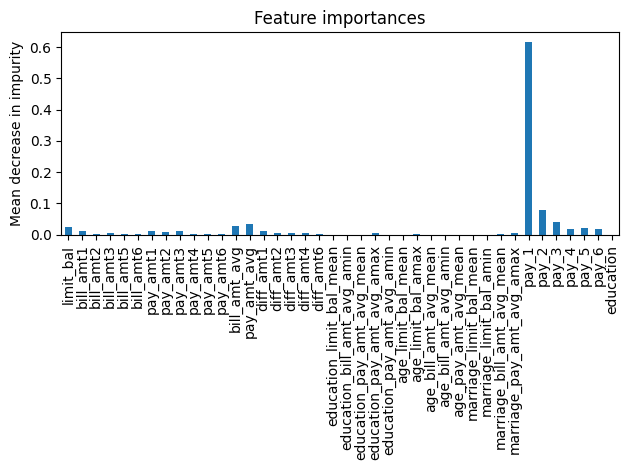

In [58]:
forest_importances = pd.Series(clf.feature_importances_, index=selected_columns)

fig, ax = plt.subplots()
forest_importances.plot.bar( ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()